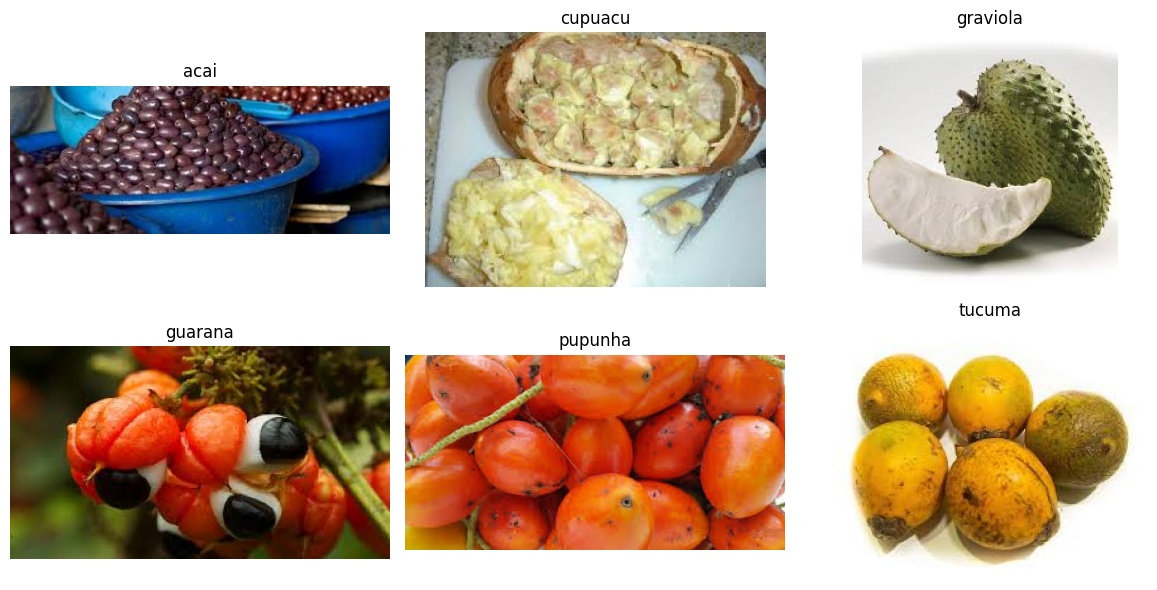

In [26]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "C:/Users/Admin/OneDrive/Desktop/JUPYTER/FruitinAmazon/train"


#List of class Directories
fruit_classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

#select one random image from each fruit class
selected_images = []
for fruit in fruit_classes:
    fruit_path = os.path.join(train_dir, fruit)
    images = os.listdir(fruit_path)
    if images:
        random_image = random.choice(images)
        selected_images.append((fruit, os.path.join(fruit_path, random_image)))

#determine grid size dynamically based on number of classes
num_classes = len(selected_images)
nrows = 2
ncols = (num_classes + 1) // 2

# Display images in a grid format
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))
axes = axes.flatten()

#plot
for ax, (label, img_path) in zip(axes, selected_images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

for ax in axes[len(selected_images):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


In [27]:
import os
from PIL import Image

# Get the list of class directories (fruit categories)
fruit_classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

corrupted_images = []

# Iterate through each class subdirectory
for fruit in fruit_classes:
    fruit_path = os.path.join(train_dir, fruit)
    images = os.listdir(fruit_path)

    for image in images:
        image_path = os.path.join(fruit_path, image)
        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify if the image is valid
        except (IOError, SyntaxError):
            os.remove(image_path)  # Remove corrupted image
            corrupted_images.append(image_path)
            print(f"Removed corrupted image: {image_path}")

# Print result
if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [28]:
import tensorflow as tf
# Define image size and batch size
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=True,
validation_split=validation_split,
subset="training",
seed=123
)
# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels="inferred",
label_mode="int",
image_size=(img_height, img_width),
interpolation="nearest",
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset="validation",
seed=123
)
# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models


#CNN model
model = models.Sequential([

 # Convolutional Layer 1
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu", input_shape=(128, 128, 3)),
    # Pooling Layer 1
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu"),
    # Pooling Layer 2
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten layer to prepare for Dense layers
    layers.Flatten(),

    # Fully Connected Layer (Dense)
    layers.Dense(128, activation="relu"),

    # Output Layer (Assuming multiple fruit classes)
    layers.Dense(len(fruit_classes), activation="softmax")  # Adjust output units based on number of classes
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,205,350 (16.04 MB)

 Trainable params: 4,205,350 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu", input_shape=(128, 128, 3)),
    # Pooling Layer 1
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation="relu"),
    # Pooling Layer 2
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Network (FCN)
     # Hidden Layer 1 with 64 neurons
    layers.Dense(64, activation="relu"),
     # Hidden Layer 2 with 128 neurons
    layers.Dense(128, activation="relu"),

    # Output Layer (Softmax for multi-class classification)
    #Output neurons = num_classes
    layers.Dense(len(fruit_classes), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model
model.compile(
    # sgd optimizer
    optimizer='sgd',
     # Loss function for multi-class classification with integer labels
    loss='sparse_categorical_crossentropy',
     # Metric to evaluate the model during training
    metrics=['accuracy']
)

In [33]:
# Define the callbacks
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/My Drive/AryaShrestha_fruit_model.h5',  # Save the model as a .h5 file
    monitor='val_loss',  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode='min',  # 'min' because we want to minimize the loss
    verbose=1  # Print a message when saving the best model
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,  # Stop after 10 epochs with no improvement
    mode='min',  # Stop when validation loss stops decreasing
    verbose=1  # Print a message when stopping early
)

# Train the model using the fit() method
history = model.fit(
    train_ds,  # The training dataset
    epochs=250,  # Number of epochs
    batch_size=16,  # Batch size
    validation_data=val_ds,  # Validation dataset
    callbacks=[checkpoint_callback, early_stopping_callback],  # Callbacks
    verbose=2  # Print detailed progress for each epoch
)

Epoch 1/250

Epoch 1: val_loss improved from inf to 1.66919, saving model to /content/drive/My Drive/AryaShrestha_fruit_model.h5


3/3 - 5s - 2s/step - accuracy: 0.2361 - loss: 1.7936 - val_accuracy: 0.8333 - val_loss: 1.6692
Epoch 2/250

Epoch 2: val_loss improved from 1.66919 to 1.58059, saving model to /content/drive/My Drive/AryaShrestha_fruit_model.h5


3/3 - 3s - 854ms/step - accuracy: 0.1944 - loss: 1.7810 - val_accuracy: 0.8333 - val_loss: 1.5806
Epoch 3/250

Epoch 3: val_loss did not improve from 1.58059
3/3 - 1s - 170ms/step - accuracy: 0.2083 - loss: 1.7733 - val_accuracy: 0.0000e+00 - val_loss: 1.8179
Epoch 4/250

Epoch 4: val_loss did not improve from 1.58059
3/3 - 0s - 157ms/step - accuracy: 0.2083 - loss: 1.7621 - val_accuracy: 0.1111 - val_loss: 1.6996
Epoch 5/250

Epoch 5: val_loss did not improve from 1.58059
3/3 - 0s - 155ms/step - accuracy: 0.2361 - loss: 1.7464 - val_accuracy: 0.0000e+00 - val_loss: 1.6888
Epoch 6/250

Epoch 6: val_loss did not improve from 1.58059
3/3 - 1s - 245ms/step - accuracy: 0.2361 - loss: 1.7291 - val_accuracy: 0.0556 - val_loss: 1.7365
Epoch 7/250

Epoch 7: val_loss did not improve from 1.58059
3/3 - 1s - 228ms/step - accuracy: 0.1944 - loss: 1.7278 - val_accuracy: 0.0000e+00 - val_loss: 1.7886
Epoch 8/250

Epoch 8: val_loss did not improve from 1.58059
3/3 - 0s - 150ms/step - accuracy: 0.2639

3/3 - 0s - 152ms/step - accuracy: 0.2778 - loss: 1.6627 - val_accuracy: 0.8333 - val_loss: 1.4310
Epoch 10/250

Epoch 10: val_loss did not improve from 1.43098
3/3 - 0s - 152ms/step - accuracy: 0.3194 - loss: 1.6579 - val_accuracy: 0.1111 - val_loss: 1.6168
Epoch 11/250

Epoch 11: val_loss did not improve from 1.43098
3/3 - 0s - 162ms/step - accuracy: 0.4583 - loss: 1.6049 - val_accuracy: 0.2778 - val_loss: 1.6210
Epoch 12/250

Epoch 12: val_loss did not improve from 1.43098
3/3 - 0s - 147ms/step - accuracy: 0.3194 - loss: 1.6107 - val_accuracy: 0.1667 - val_loss: 1.6174
Epoch 13/250

Epoch 13: val_loss improved from 1.43098 to 1.36980, saving model to /content/drive/My Drive/AryaShrestha_fruit_model.h5


3/3 - 1s - 265ms/step - accuracy: 0.4444 - loss: 1.5312 - val_accuracy: 0.7222 - val_loss: 1.3698
Epoch 14/250

Epoch 14: val_loss did not improve from 1.36980
3/3 - 1s - 168ms/step - accuracy: 0.4028 - loss: 1.4742 - val_accuracy: 0.0000e+00 - val_loss: 1.8561
Epoch 15/250

Epoch 15: val_loss improved from 1.36980 to 0.97669, saving model to /content/drive/My Drive/AryaShrestha_fruit_model.h5


3/3 - 0s - 150ms/step - accuracy: 0.3889 - loss: 1.4693 - val_accuracy: 0.8333 - val_loss: 0.9767
Epoch 16/250

Epoch 16: val_loss did not improve from 0.97669
3/3 - 0s - 138ms/step - accuracy: 0.3472 - loss: 1.4708 - val_accuracy: 0.6111 - val_loss: 1.3247
Epoch 17/250

Epoch 17: val_loss did not improve from 0.97669
3/3 - 1s - 221ms/step - accuracy: 0.4306 - loss: 1.4683 - val_accuracy: 0.5000 - val_loss: 1.3659
Epoch 18/250

Epoch 18: val_loss did not improve from 0.97669
3/3 - 0s - 123ms/step - accuracy: 0.4722 - loss: 1.4454 - val_accuracy: 0.2222 - val_loss: 1.8511
Epoch 19/250

Epoch 19: val_loss did not improve from 0.97669
3/3 - 1s - 228ms/step - accuracy: 0.3333 - loss: 1.4596 - val_accuracy: 0.2222 - val_loss: 1.8810
Epoch 20/250

Epoch 20: val_loss did not improve from 0.97669
3/3 - 0s - 124ms/step - accuracy: 0.5556 - loss: 1.3468 - val_accuracy: 0.8333 - val_loss: 1.0281
Epoch 21/250

Epoch 21: val_loss did not improve from 0.97669
3/3 - 0s - 118ms/step - accuracy: 0.4861

3/3 - 0s - 133ms/step - accuracy: 0.6389 - loss: 1.2100 - val_accuracy: 0.7778 - val_loss: 0.8937
Epoch 23/250

Epoch 23: val_loss did not improve from 0.89371
3/3 - 0s - 125ms/step - accuracy: 0.6528 - loss: 1.1736 - val_accuracy: 0.2778 - val_loss: 1.7840
Epoch 24/250

Epoch 24: val_loss did not improve from 0.89371
3/3 - 0s - 121ms/step - accuracy: 0.5833 - loss: 1.1713 - val_accuracy: 0.1667 - val_loss: 1.3810
Epoch 25/250

Epoch 25: val_loss did not improve from 0.89371
3/3 - 0s - 130ms/step - accuracy: 0.4722 - loss: 1.2248 - val_accuracy: 0.7222 - val_loss: 1.0250
Epoch 26/250

Epoch 26: val_loss did not improve from 0.89371
3/3 - 0s - 122ms/step - accuracy: 0.6528 - loss: 1.1298 - val_accuracy: 0.0000e+00 - val_loss: 2.8470
Epoch 27/250

Epoch 27: val_loss did not improve from 0.89371
3/3 - 0s - 123ms/step - accuracy: 0.5833 - loss: 1.2901 - val_accuracy: 0.7778 - val_loss: 1.0429
Epoch 28/250

Epoch 28: val_loss did not improve from 0.89371
3/3 - 0s - 120ms/step - accuracy: 0.

3/3 - 0s - 150ms/step - accuracy: 0.5417 - loss: 1.1105 - val_accuracy: 0.7778 - val_loss: 0.8812
Epoch 30/250

Epoch 30: val_loss did not improve from 0.88124
3/3 - 0s - 119ms/step - accuracy: 0.6528 - loss: 0.9070 - val_accuracy: 0.7222 - val_loss: 0.9398
Epoch 31/250

Epoch 31: val_loss did not improve from 0.88124
3/3 - 0s - 120ms/step - accuracy: 0.4861 - loss: 1.1534 - val_accuracy: 0.7778 - val_loss: 1.1461
Epoch 32/250

Epoch 32: val_loss improved from 0.88124 to 0.78604, saving model to /content/drive/My Drive/AryaShrestha_fruit_model.h5


3/3 - 0s - 127ms/step - accuracy: 0.7361 - loss: 0.9343 - val_accuracy: 0.8333 - val_loss: 0.7860
Epoch 33/250

Epoch 33: val_loss did not improve from 0.78604
3/3 - 0s - 119ms/step - accuracy: 0.7083 - loss: 0.9519 - val_accuracy: 0.6111 - val_loss: 0.9865
Epoch 34/250

Epoch 34: val_loss did not improve from 0.78604
3/3 - 0s - 127ms/step - accuracy: 0.7917 - loss: 0.7634 - val_accuracy: 0.3889 - val_loss: 1.6002
Epoch 35/250

Epoch 35: val_loss did not improve from 0.78604
3/3 - 0s - 116ms/step - accuracy: 0.6944 - loss: 0.9354 - val_accuracy: 0.7222 - val_loss: 1.1324
Epoch 36/250

Epoch 36: val_loss improved from 0.78604 to 0.46325, saving model to /content/drive/My Drive/AryaShrestha_fruit_model.h5


3/3 - 0s - 129ms/step - accuracy: 0.8333 - loss: 0.6847 - val_accuracy: 0.8889 - val_loss: 0.4633
Epoch 37/250

Epoch 37: val_loss did not improve from 0.46325
3/3 - 0s - 117ms/step - accuracy: 0.5833 - loss: 0.9882 - val_accuracy: 0.1111 - val_loss: 2.3029
Epoch 38/250

Epoch 38: val_loss did not improve from 0.46325
3/3 - 0s - 114ms/step - accuracy: 0.7361 - loss: 0.8537 - val_accuracy: 0.1667 - val_loss: 1.4241
Epoch 39/250

Epoch 39: val_loss did not improve from 0.46325
3/3 - 0s - 123ms/step - accuracy: 0.8056 - loss: 0.7238 - val_accuracy: 0.7222 - val_loss: 0.9268
Epoch 40/250

Epoch 40: val_loss did not improve from 0.46325
3/3 - 0s - 118ms/step - accuracy: 0.6806 - loss: 1.0015 - val_accuracy: 0.4444 - val_loss: 1.2856
Epoch 41/250

Epoch 41: val_loss did not improve from 0.46325
3/3 - 0s - 117ms/step - accuracy: 0.8472 - loss: 0.5802 - val_accuracy: 0.7778 - val_loss: 0.7771
Epoch 42/250

Epoch 42: val_loss did not improve from 0.46325
3/3 - 0s - 118ms/step - accuracy: 0.5278

In [34]:
# Evaluate the model on the test dataset
# Assuming val_ds is used as the test set
test_loss, test_accuracy = model.evaluate(val_ds)

# Print test results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - accuracy: 0.8889 - loss: 0.6975
Test Accuracy: 88.89%
Test Loss: 0.6975


In [35]:
# Save the trained model properly
model.save("/content/drive/MyDrive/FruitinAmazon/fruit_classification_model.h5", save_format="h5")
print("Model saved successfully.")

Model saved successfully.


In [36]:
# Reload the model
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/FruitinAmazon/fruit_classification_model.h5")
print("Model loaded successfully.")

# Print model summary
loaded_model.summary()

Model loaded successfully.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,456 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [37]:
img_height = 128
img_width = 128
batch_size = 16

# Apply the same normalization as during training
rescale = tf.keras.layers.Rescaling(1./255)

# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Admin/OneDrive/Desktop/JUPYTER/FruitinAmazon/test",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # No shuffling to match predictions with labels
)

# Normalize the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [38]:
# Evaluate the model
test_loss, test_accuracy = loaded_model.evaluate(test_ds, verbose=2)

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")

2/2 - 1s - 501ms/step - accuracy: 0.5000 - loss: 1.3852
Test Loss: 1.3852
Test Accuracy: 50.0000%


In [39]:
import numpy as np

# Make predictions on the test dataset
predictions = loaded_model.predict(test_ds)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


In [40]:
from sklearn.metrics import classification_report
import numpy as np

# Load the test dataset without mapping to get class names
raw_test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Admin/OneDrive/Desktop/JUPYTER/FruitinAmazon/test",
    image_size=(128, 128),
    batch_size=16,
    shuffle=False  # No shuffling to match predictions with labels
)

# Get class names from the dataset
class_names = raw_test_ds.class_names  # This works because raw_test_ds retains class names
print("Class Names:", class_names)

# Now, apply normalization again
test_ds = raw_test_ds.map(lambda x, y: (x / 255.0, y))

# Make predictions
predictions = loaded_model.predict(test_ds)

# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Extract true labels from the dataset
true_labels = np.concatenate([y.numpy() for _, y in test_ds])

# Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", report)


Found 30 files belonging to 6 classes.
Class Names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Classification Report:
               precision    recall  f1-score   support

        acai       1.00      0.40      0.57         5
     cupuacu       0.43      0.60      0.50         5
    graviola       0.50      1.00      0.67         5
     guarana       0.57      0.80      0.67         5
     pupunha       0.00      0.00      0.00         5
      tucuma       0.33      0.20      0.25         5

    accuracy                           0.50        30
   macro avg       0.47      0.50      0.44        30
weighted avg       0.47      0.50      0.44        30



In [24]:
!pip install seaborn

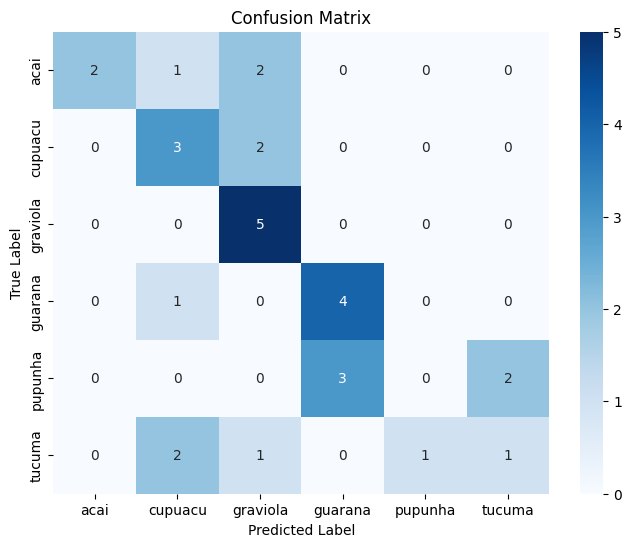

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()